In [8]:
import pandas as pd

In [9]:
data = pd.read_csv("/kaggle/input/mentalhealth01/mental_health_text_dataset.csv")

In [10]:
data.head()

,text,label
0,Action do painting summer recognize set later....,Bipolar
1,Include wife standard woman buy in middle. sel...,Depression
2,South today administration summer dream hold w...,Bipolar
3,Probably a level none such. tension headaches ...,Stress
4,Common enjoy each house throughout likely shor...,Anxiety


In [11]:
data.rename(columns={'text': 'statement', 'label': 'status'}, inplace=True)

print(data)

                                               statement                status
0      Action do painting summer recognize set later....               Bipolar
1      Include wife standard woman buy in middle. sel...            Depression
2      South today administration summer dream hold w...               Bipolar
3      Probably a level none such. tension headaches ...                Stress
4      Common enjoy each house throughout likely shor...               Anxiety
...                                                  ...                   ...
20995  There southern use every have. relaxing evenin...                Normal
20996  Member economy agent partner draw space. const...               Anxiety
20997  Gun deal truth be generation. unstable relatio...  Personality disorder
20998  Image determine political. social alienation m...  Personality disorder
20999  Admit tax save pm. intrusive thoughts success ...               Anxiety

[21000 rows x 2 columns]


In [12]:
data.shape

(21000, 2)

In [13]:
data

,statement,status
0,Action do painting summer recognize set later....,Bipolar
1,Include wife standard woman buy in middle. sel...,Depression
2,South today administration summer dream hold w...,Bipolar
3,Probably a level none such. tension headaches ...,Stress
4,Common enjoy each house throughout likely shor...,Anxiety
...,...,...
20995,There southern use every have. relaxing evenin...,Normal
20996,Member economy agent partner draw space. const...,Anxiety
20997,Gun deal truth be generation. unstable relatio...,Personality disorder
20998,Image determine political. social alienation m...,Personality disorder


In [14]:
print(data.isnull().sum())

statement    0
status       0
dtype: int64


In [15]:
data = data.dropna()

In [16]:
print(data.isnull().sum())

statement    0
status       0
dtype: int64


In [17]:
data

,statement,status
0,Action do painting summer recognize set later....,Bipolar
1,Include wife standard woman buy in middle. sel...,Depression
2,South today administration summer dream hold w...,Bipolar
3,Probably a level none such. tension headaches ...,Stress
4,Common enjoy each house throughout likely shor...,Anxiety
...,...,...
20995,There southern use every have. relaxing evenin...,Normal
20996,Member economy agent partner draw space. const...,Anxiety
20997,Gun deal truth be generation. unstable relatio...,Personality disorder
20998,Image determine political. social alienation m...,Personality disorder


In [18]:
data['statement'] = data['statement'].str.lower()

In [19]:
data

,statement,status
0,action do painting summer recognize set later....,Bipolar
1,include wife standard woman buy in middle. sel...,Depression
2,south today administration summer dream hold w...,Bipolar
3,probably a level none such. tension headaches ...,Stress
4,common enjoy each house throughout likely shor...,Anxiety
...,...,...
20995,there southern use every have. relaxing evenin...,Normal
20996,member economy agent partner draw space. const...,Anxiety
20997,gun deal truth be generation. unstable relatio...,Personality disorder
20998,image determine political. social alienation m...,Personality disorder


In [20]:
import re

# Function to remove HTML tags
def remove_html_tags(text):
    if isinstance(text, str):  # Ensure it's a string before processing
        return re.sub(r'<.*?>', '', text)
    return text  # Return as is if it's not a string

In [21]:
# Apply the function safely
data['statement'] = data['statement'].apply(remove_html_tags)
data['status'] = data['status'].apply(remove_html_tags)

In [22]:
import pandas as pd
import re

# Function to remove URLs
def remove_url(text):
    if isinstance(text, str):  # Ensure it's a string before processing
        pattern = re.compile(r'https?://\S+|www\.\S+')
        return pattern.sub(r'', text)
    return text  # Return as is if it's not a string

In [23]:
# Apply the function safely
data['statement'] = data['statement'].apply(remove_url)


In [24]:
import string,time

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
exclude = string.punctuation

exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [26]:
def remove_punc(text):
    if isinstance(text, str):  # Ensure it's a string before processing
        exclude = string.punctuation  # Get all punctuation characters
        return text.translate(str.maketrans('', '', exclude))  # Remove punctuation
    return text  # Return as is if it's not a string

In [27]:
data['statement'] = data['statement'].apply(remove_punc)

In [28]:
data

,statement,status
0,action do painting summer recognize set later ...,Bipolar
1,include wife standard woman buy in middle self...,Depression
2,south today administration summer dream hold w...,Bipolar
3,probably a level none such tension headaches s...,Stress
4,common enjoy each house throughout likely shor...,Anxiety
...,...,...
20995,there southern use every have relaxing evening...,Normal
20996,member economy agent partner draw space consta...,Anxiety
20997,gun deal truth be generation unstable relation...,Personality disorder
20998,image determine political social alienation ma...,Personality disorder


In [29]:
chat_words = {

    'AFAIK':'As Far As I Know',

    'AFK':'Away From Keyboard',

    'ASAP':'As Soon As Possible'


}





{
    "LOL": "laugh out loud",
    "BRB": "be right back",
    "IDK": "I don't know",
    "IMO": "in my opinion",
    "BTW": "by the way",
    "TTYL": "talk to you later",
    "OMG": "oh my god",
    "FYI": "For Your Information",

    "ASAP": "As Soon As Possible",

    "BRB": "Be Right Back",

    "BTW": "By The Way",

    "OMG": "Oh My God",

    "IMO": "In My Opinion",

    "LOL": "Laugh Out Loud",

    "TTYL": "Talk To You Later",

    "GTG": "Got To Go",

    "TTYT": "Talk To You Tomorrow",

    "IDK": "I Don't Know",

    "TMI": "Too Much Information",

    "IMHO": "In My Humble Opinion",

    "ICYMI": "In Case You Missed It",

    "AFAIK": "As Far As I Know",

    "BTW": "By The Way",

    "FAQ": "Frequently Asked Questions",

    "TGIF": "Thank God It's Friday",

    "FYA": "For Your Action",

    "ICYMI": "In Case You Missed It",

}

{'LOL': 'Laugh Out Loud',
 'BRB': 'Be Right Back',
 'IDK': "I Don't Know",
 'IMO': 'In My Opinion',
 'BTW': 'By The Way',
 'TTYL': 'Talk To You Later',
 'OMG': 'Oh My God',
 'FYI': 'For Your Information',
 'ASAP': 'As Soon As Possible',
 'GTG': 'Got To Go',
 'TTYT': 'Talk To You Tomorrow',
 'TMI': 'Too Much Information',
 'IMHO': 'In My Humble Opinion',
 'ICYMI': 'In Case You Missed It',
 'AFAIK': 'As Far As I Know',
 'FAQ': 'Frequently Asked Questions',
 'TGIF': "Thank God It's Friday",
 'FYA': 'For Your Action'}

In [30]:
def chat_conversion(text):
    if isinstance(text, str):  # Ensure it's a string before processing
        new_text = []
        for w in text.split():
            if w.upper() in chat_words:  # Convert chat words
                new_text.append(chat_words[w.upper()])
            else:
                new_text.append(w)
        return " ".join(new_text)
    return text  # Return as is if it's not a string

In [31]:
data['statement'] = data['statement'].apply(chat_conversion)

In [32]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Define stop words list
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stopwords(text):
    if isinstance(text, str):  # Ensure it's a string before processing
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stop_words]  # Remove stop words
        return " ".join(filtered_words)
    return text  # Return as is if it's not a string

# Sample DataFrame


# Apply the function safely
data['statement'] = data['statement'].apply(remove_stopwords)



[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [33]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [34]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer



# Initialize Porter Stemmer
stemmer = PorterStemmer()

# Function for tokenization and stemming
def tokenize_and_stem(text):
    if isinstance(text, str):  # Ensure it's a string before processing
        tokens = word_tokenize(text)  # Tokenization
        stemmed_words = [stemmer.stem(word) for word in tokens]  # Stemming
        return " ".join(stemmed_words)
    return text  # Return as is if it's not a string



# Apply the function safely
data['statement'] = data['statement'].apply(tokenize_and_stem)


In [35]:
emoji_dict = {
    # Original entries
    "😀": "HAPPY", "😊": "HAPPY", "😎": "COOL", "🤗": "HUG", "😌": "RELAXED",
    "🙃": "AMUSED", "💪": "STRENGTH", "😟": "WORRIED", "😱": "PANIC",
    "😭": "SAD", "😰": "ANXIOUS", "😩": "FRUSTRATED", "😔": "DISAPPOINTED",
    "😧": "UNEASY", "😒": "DISPLEASED", "😤": "FRUSTRATED", "🫣": "EMBARRASSED",
    "🤯": "EXTREME STRESS", "🤔": "CONFUSED", "😢": "SAD", "💔": "HEARTBROKEN",
    "😕": "CONFUSED", "😵": "SHOCKED", "😲": "SURPRISED", "😡": "ANGRY",
    "👻": "SCARED", "💃": "DANCING",

    # New additions
    "😍": "LOVE", "🤩": "EXCITED", "😨": "FEAR", "😬": "PAIN", "😪": "TIRED",
    "😷": "SICK", "🥵": "HOT", "🥶": "COLD", "🥴": "DRUNK", "😈": "MISCHIEVOUS",
    "👹": "MONSTER", "👺": "EVIL", "🤠": "ADVENTUROUS", "🥳": "CELEBRATING",
    "🤑": "GREEDY", "😑": "UNIMPRESSED", "😶": "SPEECHLESS", "😐": "NEUTRAL",
    "🙄": "SARCASM", "😏": "SMUG", "🤤": "HUNGRY", "😋": "TASTY", "🥱": "BORED",
    "🤫": "SECRETIVE", "🤭": "SURPRISED", "🧐": "CURIOUS", "😮‍💨": "RELIEF",
    "😵💫": "DIZZY", "🥺": "PLEADING", "🙏": "PRAYING", "✨": "MAGIC",
    "❤️": "LOVE", "💥": "EXPLOSION", "💫": "DIZZY", "🎉": "CELEBRATE",
    "🍕": "HUNGRY", "☕": "CAFFEINE", "🐶": "PET", "🐱": "CAT", "🌞": "SUNNY",
    "🌧️": "RAINY", "🌈": "HOPE", "🎂": "BIRTHDAY", "🎓": "GRADUATE",
    "🏆": "WIN", "⚽": "SPORTS", "🏋️": "WORKOUT", "🧘": "ZEN", "🚀": "LAUNCH",
    "💡": "IDEA", "🔥": "FIRE", "🕶️": "COOL", "🎧": "MUSIC", "🎮": "GAMING",
    "📚": "STUDYING", "🛌": "REST"
}

In [36]:
def replace_emojis_with_labels(text):
    if isinstance(text, str):
        # Remplacer les emojis par des labels
        for emoji, label in emoji_dict.items():
            text = text.replace(emoji, f" {label} ")
        return text
    return text
#application
data['statement'] = data['statement'].apply(replace_emojis_with_labels)

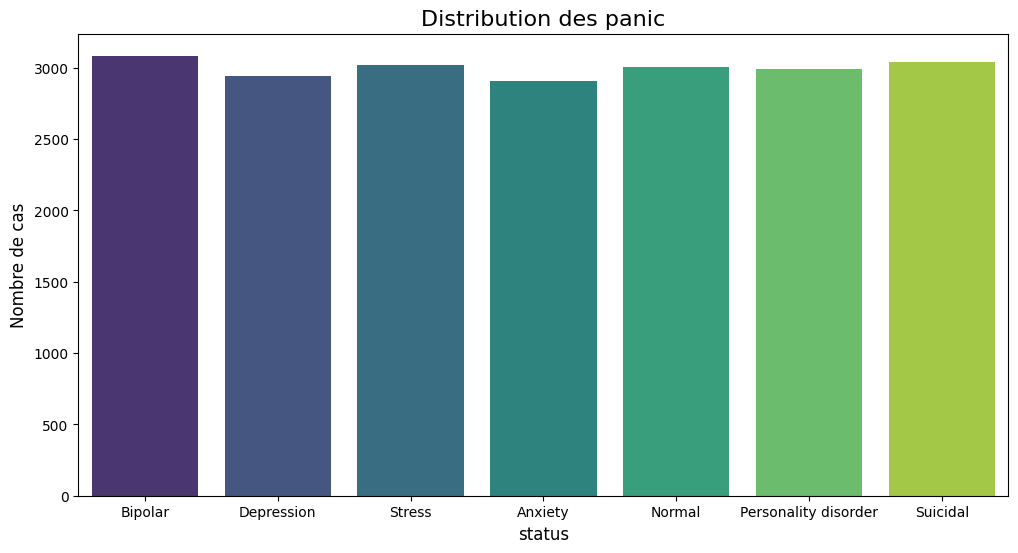

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.countplot(data=data, x='status', palette='viridis')

plt.title('Distribution des panic', fontsize=16)
plt.xlabel('status', fontsize=12)
plt.ylabel('Nombre de cas', fontsize=12)

# Afficher le graphique
plt.show()

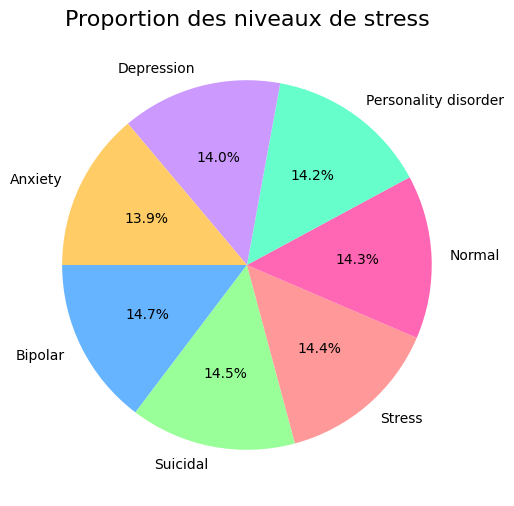

In [38]:
# Compter la distribution des niveaux de stress
stress_level_counts = data['status'].value_counts()

# Créer un pie chart
plt.figure(figsize=(8,6))
stress_level_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ff9999','#ff66b3','#66ffcc','#cc99ff','#ffcc66'], startangle=180)

# Ajouter un titre
plt.title('Proportion des niveaux de stress', fontsize=16)

# Afficher le graphique
plt.ylabel('')  # Ne pas afficher de label pour le pie chart
plt.show()

In [39]:
# Saving the DataFrame to a CSV file
data.to_csv('processed_data.csv', index=False)

In [40]:
pip install torch transformers pandas scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
# Import necessary libraries
import torch
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, get_linear_schedule_with_warmup
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

# Check for GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load your dataset
df = pd.read_csv('/kaggle/working/processed_data.csv')  # Update with your file path

# Check class distribution
print(df['status'].value_counts())



status
Bipolar                 3085
Suicidal                3044
Stress                  3017
Normal                  3008
Personality disorder    2990
Depression              2945
Anxiety                 2911
Name: count, dtype: int64


In [42]:
# Preprocessing
# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['status'])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['statement'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

# BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Parameters
MAX_LEN = 256
BATCH_SIZE = 16
EPOCHS = 10



tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [43]:
# Create PyTorch Dataset
class MentalHealthDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts.iloc[idx])
        label = self.labels.iloc[idx]
        
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Create DataLoaders
def create_data_loader(df, labels, tokenizer, max_len, batch_size):
    dataset = MentalHealthDataset(
        texts=df,
        labels=labels,
        tokenizer=tokenizer,
        max_len=max_len
    )
    
    return DataLoader(
        dataset,
        batch_size=batch_size,
        num_workers=4
    )

train_data_loader = create_data_loader(X_train, y_train, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(X_test, y_test, tokenizer, MAX_LEN, BATCH_SIZE)



In [44]:
# Model setup
model = BertForSequenceClassification.from_pretrained(
    'bert-base-uncased',
    num_labels=len(le.classes_)
)
model = model.to(device)

# Optimizer and scheduler
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [45]:
# Training function
def train_epoch(model, data_loader, loss_fn, optimizer, device, scheduler):
    model = model.train()
    losses = []
    correct_predictions = 0
    
    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["label"].to(device)
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )
        
        _, preds = torch.max(outputs.logits, dim=1)
        loss = loss_fn(outputs.logits, labels)
        
        correct_predictions += torch.sum(preds == labels)
        losses.append(loss.item())
        
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()
    
    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Evaluation function
def eval_model(model, data_loader, loss_fn, device):
    model = model.eval()
    losses = []
    correct_predictions = 0
    
    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["label"].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask
            )
            
            _, preds = torch.max(outputs.logits, dim=1)
            loss = loss_fn(outputs.logits, labels)
            
            correct_predictions += torch.sum(preds == labels)
            losses.append(loss.item())
    
    return correct_predictions.double() / len(data_loader.dataset), np.mean(losses)

# Training loop
for epoch in range(EPOCHS):
    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)
    
    train_acc, train_loss = train_epoch(
        model,
        train_data_loader,
        loss_fn,
        optimizer,
        device,
        scheduler
    )
    
    print(f'Train loss {train_loss} accuracy {train_acc}')
    
    test_acc, test_loss = eval_model(
        model,
        test_data_loader,
        loss_fn,
        device
    )
    
    print(f'Test loss {test_loss} accuracy {test_acc}')



Epoch 1/10
----------
Train loss 0.1751554946680664 accuracy 0.9392857142857143
Test loss 0.010192986108436154 accuracy 0.9980952380952381
Epoch 2/10
----------
Train loss 0.002570269206813204 accuracy 0.9995238095238095
Test loss 0.004257939243169073 accuracy 0.9990476190476191
Epoch 3/10
----------
Train loss 0.0028707191647083076 accuracy 0.9994642857142857
Test loss 0.004950597087863501 accuracy 0.9992857142857143
Epoch 4/10
----------
Train loss 0.0045343948094800695 accuracy 0.9994047619047619
Test loss 0.003852505228827338 accuracy 0.9995238095238095
Epoch 5/10
----------
Train loss 0.0030074037890430883 accuracy 0.9994642857142857
Test loss 0.004081368709405014 accuracy 0.9992857142857143
Epoch 6/10
----------
Train loss 0.0004786604663933672 accuracy 0.9999404761904762
Test loss 0.0008315103207509027 accuracy 0.9997619047619047
Epoch 7/10
----------
Train loss 3.7861418421103045e-05 accuracy 1.0
Test loss 6.704604885434225e-05 accuracy 1.0
Epoch 8/10
----------
Train loss 0.00

In [46]:
# Save model
torch.save(model.state_dict(), 'bert_mental_health_model1.bin')

# Inference example
def predict(text):
    # Preprocess text
    encoded_text = tokenizer.encode_plus(
        text,
        max_length=MAX_LEN,
        add_special_tokens=True,
        return_token_type_ids=False,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    
    # Move to device
    input_ids = encoded_text['input_ids'].to(device)
    attention_mask = encoded_text['attention_mask'].to(device)
    
    # Get prediction
    with torch.no_grad():
        output = model(input_ids=input_ids, attention_mask=attention_mask)
    
    _, prediction = torch.max(output.logits, dim=1)
    
    return le.inverse_transform(prediction.cpu().numpy())[0]



Prediction: Anxiety


In [54]:
# Test with sample text
sample_text = "I feel fine, just going through my usual routine."
print(f"Prediction: {predict(sample_text)}")

Prediction: Normal
